In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Display the row's columns and data in dictionary format for measurement
measurement_first_row = session.query(Measurement).first()
measurement_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x21732439780>,
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01'}

In [11]:
# Display the row's columns and data in dictionary format for station
station_first_row = session.query(Station).first()
station_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x21732439da0>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [12]:
## Design a query to retrieve the last 12 months of precipitation data and plot the results

# Find the latest data
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [13]:
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date 1 Year Ago:", query_date)

Query Date 1 Year Ago: 2016-08-23


In [14]:
# Perform a query to retrieve the data and precipitation scores
precipitation_results = session.query(Measurement.prcp, Measurement.date).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.prcp.desc()).all()
precipitation_results

[(6.7, '2016-09-14'),
 (6.25, '2017-04-29'),
 (5.04, '2017-02-11'),
 (4.0, '2017-07-22'),
 (3.46, '2016-10-04'),
 (3.35, '2016-09-15'),
 (2.98, '2017-02-12'),
 (2.9, '2017-02-13'),
 (2.87, '2016-11-21'),
 (2.82, '2017-04-14'),
 (2.64, '2017-01-25'),
 (2.62, '2017-02-12'),
 (2.6, '2017-04-28'),
 (2.46, '2016-08-31'),
 (2.4, '2017-03-01'),
 (2.4, '2017-07-18'),
 (2.39, '2017-02-11'),
 (2.37, '2016-12-30'),
 (2.36, '2017-04-21'),
 (2.33, '2016-09-14'),
 (2.3, '2017-04-14'),
 (2.28, '2016-08-24'),
 (2.2, '2017-03-01'),
 (2.17, '2017-05-24'),
 (2.15, '2016-08-24'),
 (2.15, '2016-08-24'),
 (2.12, '2017-03-01'),
 (2.11, '2016-11-22'),
 (2.07, '2016-08-28'),
 (2.05, '2016-11-22'),
 (2.03, '2017-04-18'),
 (2.0, '2017-03-01'),
 (1.91, '2017-02-12'),
 (1.88, '2017-03-02'),
 (1.85, '2017-01-24'),
 (1.84, '2016-09-14'),
 (1.84, '2017-04-21'),
 (1.83, '2017-02-12'),
 (1.8, '2017-02-07'),
 (1.79, '2016-08-23'),
 (1.79, '2017-02-07'),
 (1.74, '2017-04-21'),
 (1.73, '2017-02-11'),
 (1.69, '2017-06-15')

In [18]:
precipitation_results[0][0]

6.7

In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precipitation_results, columns=['Precipitation', 'Date'])
df.set_index('Date', inplace=True)
df.head()

,Precipitation
Date,
2016-09-14,6.70
2017-04-29,6.25
2017-02-11,5.04
2017-07-22,4.00
2016-10-04,3.46


In [19]:
# Sort the dataframe by date
sorted_df = df.sort_values('Date', ascending=True)
sorted_df.head()

,Precipitation
Date,
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,1.79
2016-08-23,0.00


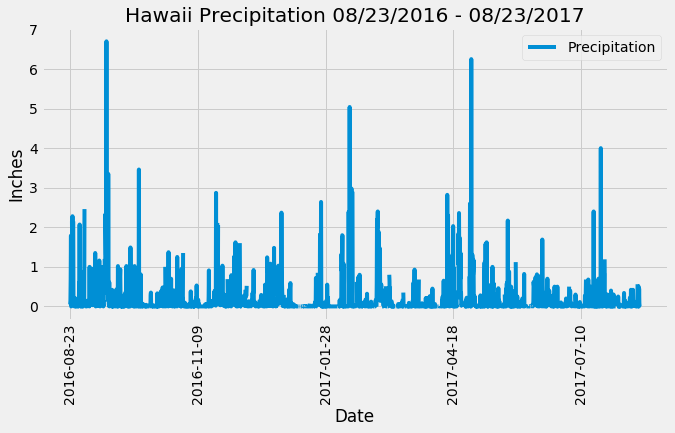

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data

sorted_df.plot(figsize = (10,5))
plt.title("Hawaii Precipitation 08/23/2016 - 08/23/2017")
plt.ylabel('Inches')
plt.xticks(rotation='vertical')
plt.legend(loc='upper right')

plt.show()

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [22]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.station).count()

9

In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_station_count = (session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all())

active_station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_station = active_station_count[0][0]

station_temp_stats = session.query(func.min(Measurement.tobs),
                                   func.max(Measurement.tobs),
                                   func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station)

print(f'Lowest Temperature = {station_temp_stats[0][0]} F')
print(f'Highest Temperature = {station_temp_stats[0][1]} F')
print(f'Average Temperature = {round(station_temp_stats[0][2],1)} F')

Lowest Temperature = 54.0 F
Highest Temperature = 85.0 F
Average Temperature = 71.7 F


In [25]:
# Query the last 12 months of temperature observation data for most active station 
temp_results = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= '2016-08-23', Measurement.station == most_active_station).\
    order_by(Measurement.tobs.asc()).all()
temp_results


[('2017-02-02', 59.0),
 ('2017-02-08', 59.0),
 ('2017-02-09', 59.0),
 ('2017-02-03', 60.0),
 ('2017-04-30', 60.0),
 ('2017-02-25', 61.0),
 ('2016-12-15', 62.0),
 ('2017-01-06', 62.0),
 ('2017-01-09', 62.0),
 ('2017-01-10', 62.0),
 ('2017-02-10', 62.0),
 ('2017-03-07', 62.0),
 ('2016-11-07', 63.0),
 ('2017-01-04', 63.0),
 ('2017-01-05', 63.0),
 ('2017-01-11', 63.0),
 ('2017-01-03', 64.0),
 ('2017-02-07', 64.0),
 ('2017-03-08', 64.0),
 ('2016-12-13', 65.0),
 ('2017-01-12', 65.0),
 ('2017-01-28', 65.0),
 ('2017-02-16', 65.0),
 ('2017-02-27', 65.0),
 ('2017-03-18', 65.0),
 ('2017-05-01', 65.0),
 ('2016-12-12', 66.0),
 ('2017-01-27', 66.0),
 ('2017-03-10', 66.0),
 ('2017-03-13', 66.0),
 ('2017-03-16', 66.0),
 ('2016-11-10', 67.0),
 ('2016-12-05', 67.0),
 ('2016-12-06', 67.0),
 ('2016-12-31', 67.0),
 ('2017-02-26', 67.0),
 ('2017-03-06', 67.0),
 ('2017-03-09', 67.0),
 ('2017-03-14', 67.0),
 ('2017-04-04', 67.0),
 ('2017-04-06', 67.0),
 ('2017-04-10', 67.0),
 ('2017-04-17', 67.0),
 ('2017-04-

In [26]:
# Save the query results as a DataFrame and set the index to the date column
temp_df = pd.DataFrame(temp_results, columns=['Date', 'TOBS'])
temp_df.set_index('Date', inplace=True)
temp_df.head()

,TOBS
Date,
2017-02-02,59.0
2017-02-08,59.0
2017-02-09,59.0
2017-02-03,60.0
2017-04-30,60.0


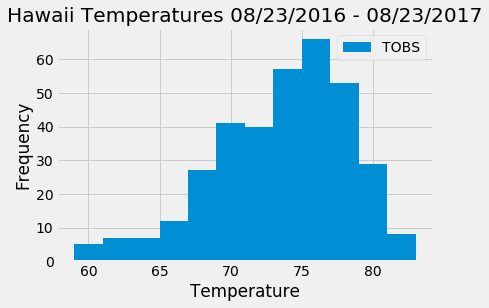

In [27]:
# Plot the results as a histogram
temp_df.plot.hist(bins=12)
plt.title("Hawaii Temperatures 08/23/2016 - 08/23/2017")
plt.xlabel('Temperature')

plt.show()

## Bonus Challenge Assignment

In [28]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
